# Exercise

Dataset: Social media data - https://github.com/abulbasar/data/blob/master/snsdata.csv?raw=true
        
- Use 36 features - "basketball", "football" … "drunk", "drugs" (these columns indicate how many times a user has used these words in her profile) and apply K-Means clustering to group the profiles into 5 clusters
- Find the number of users in each cluster and mean distance with each cluster.
- Which cluster is the most dense in terms of average distance.
- How many anomalies are there?
- For each cluster, find the top 3 dominant features.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

%matplotlib inline

In [3]:
df = pd.read_csv("https://github.com/abulbasar/data/blob/master/snsdata.csv?raw=true")

In [4]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
features = df.columns[4:]

In [8]:
X = df[features] * 1.0

In [21]:
axes

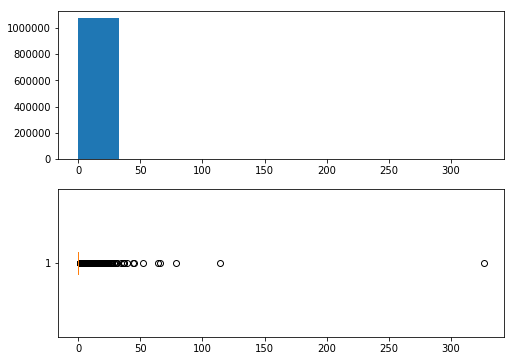

In [33]:
fig, _ = plt.subplots(2, 1, figsize = (8, 6))
axes = fig.axes 

axes[0].hist(X.values.flatten());
axes[1].boxplot(a, vert = False);

In [14]:
X.values.flatten().shape

(1080000,)

In [35]:
a = X.values.flatten()
a[a>20]

array([ 34.,  22.,  22.,  79.,  44.,  25.,  30.,  27., 114.,  27.,  21.,
        45.,  21.,  23.,  22.,  29.,  22.,  37.,  24.,  26.,  21.,  27.,
        22.,  66.,  26.,  22.,  27.,  64.,  22., 327.,  39.,  21.,  27.,
        22.,  21.,  23.,  23.,  23.,  31.,  24.,  26.,  21.,  27.,  52.,
        30.,  37.,  27.,  36.,  29.,  24.,  23.,  29.])

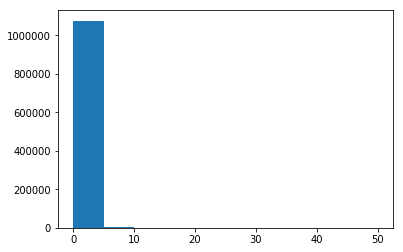

In [40]:
X_clipped = np.clip(X.values, a_min=0, a_max=50)
plt.hist(X_clipped.flatten());

In [42]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X_clipped)

In [43]:
%%time 

k = 5
kmeans = cluster.KMeans(n_clusters=k, random_state=1)
kmeans.fit(X_std)

CPU times: user 7.32 s, sys: 33.5 ms, total: 7.36 s
Wall time: 1.25 s


In [44]:
y_pred = kmeans.predict(X_std)

In [48]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroids.T

,0,1,2,3,4
basketball,0.675249,0.133561,0.587581,0.394009,0.191388
football,0.585382,0.135943,0.543095,0.415899,0.299841
soccer,0.485216,0.138699,0.399444,0.317972,0.137161
softball,0.435050,0.075680,0.297498,0.215438,0.141946
volleyball,0.384053,0.067972,0.212234,0.268433,0.103668
swimming,0.287209,0.078483,0.272475,0.259217,0.165869
cheerleading,0.264950,0.048818,0.238184,0.309908,0.052632
baseball,0.280233,0.048164,0.275255,0.120968,0.044657
tennis,0.160299,0.060590,0.144578,0.157834,0.103668
sports,0.287708,0.078389,0.525487,0.188940,0.092504


In [67]:
centroids.iloc[0, :].T.sort_values(ascending = False)[:10]

music         1.100997
god           0.955980
dance         0.937043
shopping      0.833555
cute          0.747010
church        0.695349
basketball    0.675249
hair          0.664950
football      0.585382
mall          0.585382
Name: 0, dtype: float64

In [68]:
centroids.iloc[1, :].T.sort_values(ascending = False)[:10]


music       0.540036
god         0.294076
dance       0.240166
hair        0.196721
shopping    0.184901
cute        0.170046
band        0.159815
rock        0.152013
soccer      0.138699
football    0.135943
Name: 1, dtype: float64

In [69]:
centroids.iloc[2, :].T.sort_values(ascending = False)[:10]

hair      3.190918
sex       2.557924
music     2.119555
kissed    1.562558
die       1.192771
rock      1.162187
dance     0.988879
god       0.987025
drugs     0.957368
drunk     0.798888
Name: 2, dtype: float64

In [70]:
centroids.iloc[4, :].T.sort_values(ascending = False)[:10]

band        4.883573
marching    1.484848
music       1.368421
god         0.585327
dance       0.496013
hair        0.385965
rock        0.368421
shopping    0.339713
cute        0.322169
church      0.303030
Name: 4, dtype: float64

In [53]:
df["cluster"] = y_pred

distances = np.zeros(len(y_pred))
for i in range(k):
    center = kmeans.cluster_centers_[i]
    distances[y_pred == i] = metrics.euclidean_distances(X_std[y_pred == i]
                                                        , center.reshape(1, -1)).squeeze()
df["distance"] = distances
df.sample(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster,distance
28310,2009,F,16.112,71,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,3.754600
12991,2007,F,17.886,116,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,3.385416
23267,2009,F,15.463,23,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.445337
16789,2008,F,16.427,60,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,7.792734
13095,2007,F,17.703,36,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3.790442
9166,2007,F,NaN,89,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,2.874738
8473,2007,F,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,2.562898
17475,2008,M,16.534,85,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.854342
29407,2009,F,16.824,63,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4.829035
26035,2009,F,16.049,69,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.545282


In [54]:
df.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,7.568164,6031
1,2.980904,21395
2,10.860457,1079
3,7.196021,868
4,6.476727,627


In [72]:
df.pivot_table("distance", "cluster", "gender", aggfunc="mean")

gender,F,M
cluster,,
0,7.389022,9.167473
1,3.072234,2.922587
2,10.833636,10.561283
3,7.334591,6.452092
4,6.514377,6.552794


In [73]:
df.pivot_table("distance", "cluster", "gender", aggfunc="count")

gender,F,M
cluster,,
0,5058,604
1,14939,4266
2,872,144
3,727,75
4,458,133


In [75]:
df.gender.value_counts()/len(df)

F    0.735133
M    0.174067
Name: gender, dtype: float64

In [55]:
def find_outliers(a):

    q1, q2, q3 = np.percentile(a, [25, 50, 75])
    iqr = q3 - q1
    lower_whisker = max(q1 - 1.5 * iqr, np.min(a))
    upper_whisker = min(q3 + 1.5 * iqr, np.max(a))

    q1, q2, q3, iqr, lower_whisker, upper_whisker

    is_outlier = (a < lower_whisker) | (a > upper_whisker)
    
    return is_outlier

In [60]:
anamolies = df[find_outliers(df.distance)]
anamolies.shape, df.shape

((1331, 42), (30000, 42))

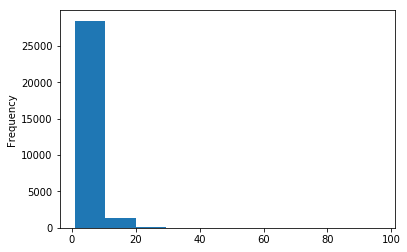

In [58]:
df.distance.plot.hist()

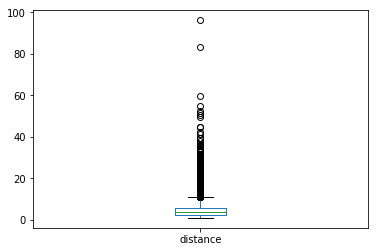

In [59]:
df.distance.plot.box()